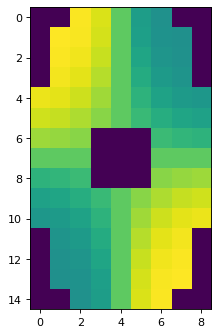

In [448]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

def IDW(point):
    #Степень "затухания"
    pwr=4
    #вектор-коэффициент обратнопропорциональный расстояниям между расчетной точкой и точками с данными
    distance=1/np.apply_along_axis(lambda x:(((point-x[:2])**2).sum()**0.5),1,data)**pwr
    return (np.apply_along_axis(lambda x:x[2],1,data)*distance).sum()/distance.sum()
    
area=np.asarray(pd.read_excel('./hm.xlsx',sheet_name='area',header=None),dtype=np.float64)
data=np.asarray(pd.read_excel('./hm.xlsx',sheet_name='data',header=None))
np.place(area, area!=0, np.apply_along_axis(IDW,1,np.transpose(area.nonzero())))

plt.figure(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(area)
plt.show()


In [ ]:
from pyproj import transform
import pandas as pd
import geopandas as gpd
#import contextily as ctx


ds=pd.read_excel('./hm.xlsx',sheet_name='hm')
ds=gpd.GeoDataFrame(ds,geometry=gpd.points_from_xy(ds['Lon'], ds['Lat'], crs='EPSG:4326')).to_crs('EPSG:3857')
#ds['Lon'], ds['Lat']=transform('epsg:3857','epsg:4326',ds['Lon'].tolist(),ds['Lat'].tolist())

bel=gpd.read_file('./bel.json').to_crs('EPSG:3857').plot(
    color='white',
    edgecolor='black',
    ax=ds.plot(zorder=2,figsize = (25,15),column='Val')
)

#ctx.add_basemap(ax)




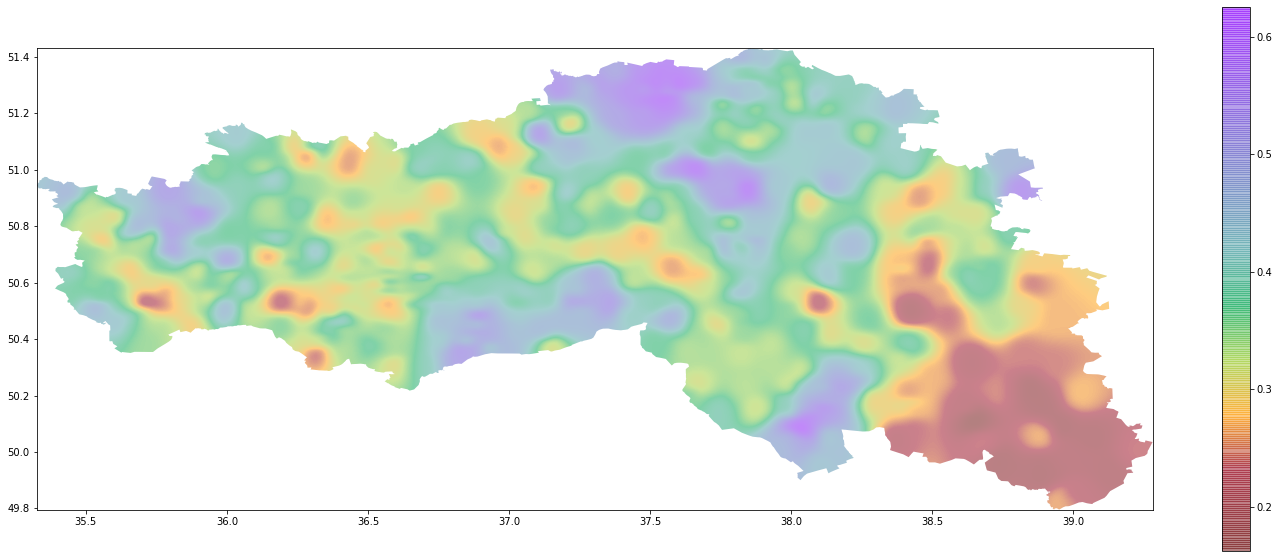

In [183]:
from pyproj import transform
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon,Circle
import numpy as np
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap



def IDW(X,Y):
    #Степень "затухания"
    pwr=4
    #вектор-коэффициент обратнопропорциональный расстояниям между расчетной точкой и точками с данными
    distance=1/np.apply_along_axis(lambda x:((X-x[1])**2+(Y-x[0])**2)**0.5,1,data)**pwr
    return((data[:,2]*distance.T).sum(axis=2).T)/distance.sum(axis=0)


ds=pd.read_excel('./hm.xlsx',sheet_name='hm')
#ds=gpd.GeoDataFrame(ds,geometry=gpd.points_from_xy(ds['Lon'], ds['Lat'], crs='EPSG:4326')).to_crs('EPSG:3857')
#ds['Lon'], ds['Lat']=transform('epsg:4326','epsg:3857',ds['Lon'].tolist(),ds['Lat'].tolist())
data=np.asarray(ds)

reg=gpd.read_file('./bel.json')#.to_crs('EPSG:3857').plot()

x,y=np.meshgrid(
    np.linspace(reg.geometry.bounds.minx[0],reg.geometry.bounds.maxx[0], 100),
    np.linspace(reg.geometry.bounds.miny[0],reg.geometry.bounds.maxy[0], 100)
    #np.linspace(35,37,5),
    #np.linspace(49,51,5)
)

Z=IDW(x,y)

fig, ax = plt.subplots(figsize=(25,10))
patch=Polygon(gpd.read_file('./bel.json').geometry[0].exterior.coords,transform=ax.transData)
cmap = LinearSegmentedColormap.from_list(
    'mycmap',
    [
        (0.0, '#660000'),
        (0.15, '#960018'),
        (0.25, '#ff9900'),
        (0.35, '#9acd32'),
        (0.45, '#00a550'),
        (0.55, '#48a1a1'),
        (1.0, '#8b00ff')
    ]
)

im=plt.imshow(
    Z,
    cmap=cmap,
    alpha=0.5,
    extent=(
        reg.geometry.bounds.minx[0],
        reg.geometry.bounds.maxx[0],
        reg.geometry.bounds.miny[0],
        reg.geometry.bounds.maxy[0]
        #35,37,49,51
    ),
    origin='lower',
    interpolation='bicubic',
    clip_path=patch, clip_on=True
)
plt.colorbar()
plt.show()


In [441]:
def qqq(X,Y):
    pwr=4
    d=1/np.apply_along_axis(lambda x:((X-x[0])**2+(Y-x[1])**2)**0.5,1,b)**pwr
    print(d)
    return(b[:,2]*d.T).sum(axis=2)/d.sum(axis=0)

a=np.linspace(0,2,2)
b=np.array([[0,0,100],[1,1,1000],[0,1,200],[1,0,0]])
x,y=np.meshgrid(a,a)
qqq(x,y)

[[[     inf 0.0625  ]
  [0.0625   0.015625]]

 [[0.25     0.25    ]
  [0.25     0.25    ]]

 [[1.       0.04    ]
  [1.       0.04    ]]

 [[1.       1.      ]
  [0.04     0.04    ]]]


C:\Users\mikhail.libman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mikhail.libman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


array([[         nan, 337.33826248],
       [195.37892791, 750.99457505]])

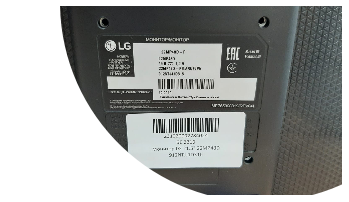

In [91]:
from matplotlib.patches import Polygon,Circle

image = plt.imread('./1.jpg')

fig, ax = plt.subplots()
im = ax.imshow(image)
patch = Circle((260, 200), radius=200, transform=ax.transData)
im.set_clip_path(patch)

ax.axis('off')
plt.show()